<a href="https://colab.research.google.com/github/MarkusNeusinger/defichain-data-toolkit/blob/main/notebooks/dfi_reserve_stakingPools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from google.colab import files

# import defichain-data-toolkit utils, style
if os.path.isdir('defichain-data-toolkit'): os.system('rm -rf defichain-data-toolkit')
!git clone https://github.com/MarkusNeusinger/defichain-data-toolkit.git
sys.path.insert(1, 'defichain-data-toolkit')

from utils import fetch_history
plt.style.use('/content/defichain-data-toolkit/utils/defichain.mplstyle')

print(f"\nNotebook last run: {datetime.utcnow()}")

Cloning into 'defichain-data-toolkit'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 61 (delta 20), reused 31 (delta 9), pack-reused 0
Receiving objects: 100% (61/61), 1.43 MiB | 13.11 MiB/s, done.
Resolving deltas: 100% (20/20), done.

Notebook last run: 2023-09-29 15:30:03.973650


In [2]:
# fetching data
df = fetch_history('hourly', ['dETH-DFI DFI Reserve', 'dSOL-DFI DFI Reserve', 'dDOT-DFI DFI Reserve',
                             'dMATIC-DFI DFI Reserve', 'dSUI-DFI DFI Reserve'],
                   from_timestamp='2023-09-08')
df.sort_values('datetime_utc', ascending=True, inplace=True)
df['DFI Reserve Staking Pools'] = df.drop('datetime_utc', axis=1).sum(axis=1, skipna=True)
df.head()

100%|██████████| 5/5 [00:00<00:00,  7.48it/s]


,datetime_utc,dsol-dfidfireserve,ddot-dfidfireserve,dsui-dfidfireserve,dmatic-dfidfireserve,deth-dfidfireserve,DFI Reserve Staking Pools
0,2023-09-08 00:00:00,208691.128500,123608.222008,135435.803191,165653.332545,2.065377e+07,2.128716e+07
1,2023-09-08 01:00:00,211230.597892,123654.198621,141938.661797,166180.006180,2.065311e+07,2.129612e+07
2,2023-09-08 02:00:00,211836.562373,123654.217659,141938.661797,170947.159023,2.064653e+07,2.129491e+07
3,2023-09-08 03:00:00,214411.893641,126319.105656,141938.661797,174989.086494,2.064543e+07,2.130309e+07
4,2023-09-08 04:00:00,220214.393860,134223.615054,141927.657781,176997.925315,2.064557e+07,2.131893e+07


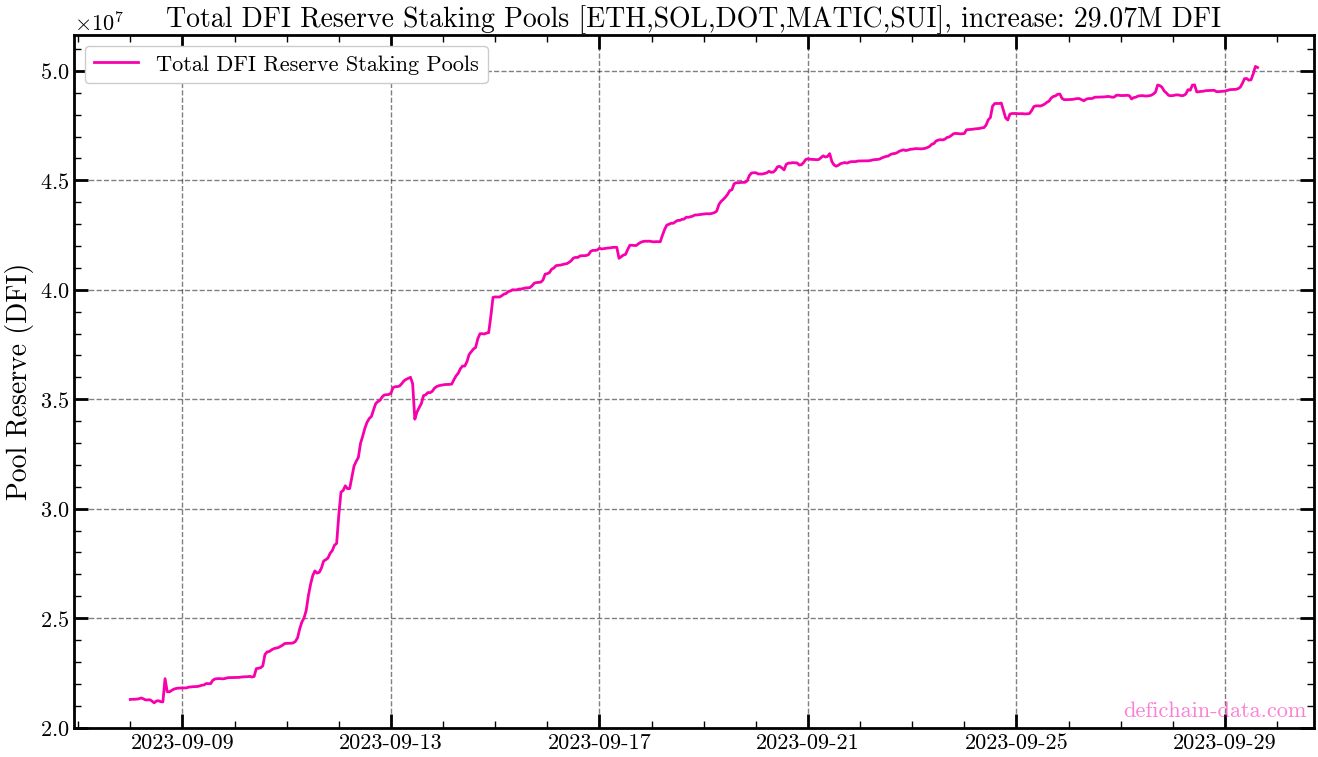

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Plotting DFI reserve of staking Pools
fig, axs = plt.subplots()
axs.plot(df['datetime_utc'], df['DFI Reserve Staking Pools'], label='Total DFI Reserve Staking Pools')

delta = (df['DFI Reserve Staking Pools'].max()-df['DFI Reserve Staking Pools'].min())/1000000
axs.set_title(f'Total DFI Reserve Staking Pools [ETH,SOL,DOT,MATIC,SUI], increase: {round(delta,2)}M DFI')

axs.set_ylabel('Pool Reserve (DFI)')
axs.set_ylim([2*10**7,None])
axs.legend()

axs.text(0.92, 0.025, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=16, color='#F800AB', alpha=0.5)

plt.savefig('dfi_reserve_staking_pools.png')
plt.show()
files.download('dfi_reserve_staking_pools.png')